# 2 {-}

**(This problem is based on the cheating-casino hidden Markov model we discussed in class.) Let $X(t)$ be a Markov chain on the state space $\{F,C \}$ ($F$ - fair, $C$ - cheating). Suppose that $X(t)$ changes state with probability $\alpha = .05$ regardless of its current state. Let $Y(t)$ be a r.v. with values from $\{1, 2, 3, 4, 5, 6 \}$. ($Y(t)$ corresponds to the t-th role of a die). If $X(t) = F$ then $Y(t)$ is uniformly distributed on $\{1, 2, 3, 4, 5, 6\}$ (a fair die). If $X(t) = C$ then $P(Y(t) = 6) = 1/50$ and all values for $Y(t)$ are equally likely. Assume $X(0) = F$ where $\pi$ is the stationary distribution of $X(t).$**

# a {-}

**Write a function, SampleCasino(T) that samples $X(t)$, $Y(t)$ for $t \le T$.**

And so we need to represent the distribution of the data. Do so, we first keep in mind that $X(t)$ is a markov chain and that $Y(t)$ are independent but dependent on the $X(t)$ as shown in the picture above. So:
    
$$p(X,Y)=p(Y(0)=j_0|X(0)=i_0)p(X(0)=i_0)p(Y(1)=j_1|X(1)=i_1)p(X(1)=i_1|X(0)=i_0)$$
$$p(Y(2)=j_2|X(2)=i_2)p(X(2)=i_2|X(0)=i_0, X(1)=i_1)\ldots p(Y(T)=j_T|X(T)=i_T)$$
$$p(X(T)=i_T|X(0)=i_0, X(1)=i_1, \ldots, X(T-1)=i_{T-1})$$



$$=p(Y(0)=j_0|X(0)=i_0)p(X(0)=i_0)p(Y(1)=j_1|X(1)=i_1)p(X(1)=i_1|X(0)=i_0)$$
$$p(Y(2)=j_2|X(2)=i_2)p(X(2)=i_2|X(1)=i_1)\ldots p(Y(T)=j_T|X(T)=i_T)$$
$$p(X(T)=i_T|X(T-1=i_{T-1}))~\text{by markov property}$$

$$=p(X(0)=i_0)\prod_{t=1}^{T}p(X(t)=i_t|X(t-1)=i_{t-1})\prod_{t=0}^{T}p(Y(t)=j_t|X(t)=i_t).$$

Now that we have the joint distribution of the $X(t)$, $Y(t)$, the conditional distribution we are interested in sampling from:

$$p(X(0)=i_0,X(1)=i_1,...,X(T)=i_T |Y(0)=j_0,Y(1) = j_1,...,Y(T)= j_T)$$
$$=\frac{p(X(0)=i_0)\prod_{t=1}^{T}p(X(t)=i_t|X(t-1)=i_{t-1})\prod_{t=0}^{T}p(Y(t)=j_t|X(t)=i_t)}{p(Y(0)=j_0,Y(1) = j_1,...,Y(T) = j_T)}$$

To sample from the above distribution we will use Metropolis-Hastings. We first consider out sample space, which is $\Omega=\{\omega: \omega \in R^{T+1}, \omega_i \in \{0,1\}~\text{for}~i=1,2,\ldots, T, \omega_0=0\}$. 

In [1]:
def SampleCasino(T):
    """
    Args:
        T: scalar
    Returns:
        x, y: matrices of size (T,)
    
    """
    x_start = 0
    x = [x_start]
    y_start = np.random.choice(range(1,7), p=dist_Y[x[0]])
    y = [y_start]

    for i in range(1, T+1):
        xi = np.random.choice([0, 1], p=P[x[i-1]])
        x.append(xi)
        yi = np.random.choice(range(1,7), p=dist_Y[x[i-1]])
        y.append(yi)   
    
    return x, y

# b {-}

**Use your simulation from part (a) to produce a single realization of $X(t)$ and $Y(t)$ up to time step $T = 200$. Pretend that you don’t know the $X(t)$ values, but that you know the $Y(t)$ values generated. Let $(j_0,j_1,...,j_T)$ be the sequence of $Y(t)$ values you generated. Given a sequence $(i_0,i_1,...,i_T)$ of states $i \in \{F,C\}$, write an expression for the probability**

$$P(X(0)=i_0,X(1)=i_1,...,X(T)=i_T |Y(0)=j_0,Y(1) = j_1,...,Y(T) = j_T)$$

**Set $\alpha = P(Y(0) = j_0,Y(1) = j_1,...,Y(T) = j_T)$. Your expression should be a function of $\alpha$ and the $i_s, j_s$ for $s = 0,1,2,...,T$. Provide an expression for $\alpha$ (you can express $\alpha$ through $T + 1$ sums).**

I am letting Fair$=0$ and Cheat$=1.$

In [2]:
import numpy as np

In [3]:
first = np.repeat(1/6,6)
second = np.concatenate((np.repeat((49/50)/5, 5), np.array([1/50])))

dist_Y = np.concatenate((first, second), axis=0).reshape(2,6)
dist_Y

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.196     , 0.196     , 0.196     , 0.196     , 0.196     ,
        0.02      ]])

In [4]:
P = np.array([[0.95,0.05],[0.05,0.95]])
P

array([[0.95, 0.05],
       [0.05, 0.95]])

In [9]:
X, Y = SampleCasino(200) 

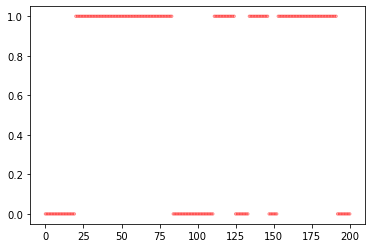

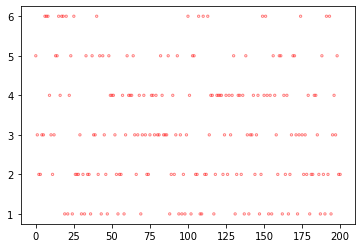

In [10]:
import matplotlib.pyplot as plt
plt.scatter(range(0, len(X)), X, facecolors='none', edgecolors='red', alpha=0.5, s=5)
plt.show()

plt.scatter(range(0, len(Y)), Y, facecolors='none', edgecolors='red', alpha=0.5, s=5)
plt.show()

Our Markov Model is as follows:

![alt text](hmm-bare.png "Title")

And so we need to represent the distribution of the data. Do so, we first keep in mind that $X(t)$ is a markov chain and that $Y(t)$ are dependent on the $X(t)$ as shown in the picture above. So:
    
$$p(X(0)=i_0, X(1)=i_1,\ldots, X(T)=i_T,Y(0)=j_0, Y(1)=j_1, \ldots, Y(T)=j_T)$$

$$=p(X(0)=i_0)P(Y(0)=j_0|X(0)=i_0)\prod_{t=1}^{T}p(Y(t)=j_t|X(t)=i_t)p(X(t)=i_t|X(t-1)=i_{t-1}))$$


$$=p(X(0)=i_0)\prod_{t=1}^{T}p(X(t)=i_t|X(t-1)=i_{t-1})\prod_{t=0}^{T}p(Y(t)=j_t|X(t)=i_t)$$

However, in the context of the problem, $X(0)=0$ so the above reduces to:

$$=\prod_{t=1}^{T}p(X(t)=i_t|X(t-1)=i_{t-1})\prod_{t=0}^{T}p(Y(t)=j_t|X(t)=i_t)$$

$$=p(Y(0)=j_0|X(0)=0)\prod_{t=1}^{T}p(X(t)=i_t|X(t-1)=i_{t-1})p(Y(t)=j_t|X(t)=i_t)$$

By letting $P$ be the transition probability matrix and $g_{i_t}(j_t)=P(Y(t)=j_t|X(t)=i_t)$ we get the following form:

$$g_{0}(j_0)\prod_{t=1}^{T}g_{i_t}(j_t)P_{i_{t-1}i_{t}}$$

Now that we have the joint distribution of the $X(t)$'s, $Y(t)$'s, the conditional distribution we are interested in sampling from:

$$p(X(0)=0,X(1)=i_1,...,X(T)=i_T |Y(0)=j_0,Y(1) = j_1,...,Y(T) = j_T)$$
$$=\frac{g_{0}(j_0)\prod_{t=1}^{T}g_{i_t}(j_t)P_{i_{t-1}i_{t}}}{p(Y(0)=j_0,Y(1) = j_1,...,Y(T) = j_T)}$$


$$=\frac{g_{0}(j_0)\prod_{t=1}^{T}g_{i_t}(j_t)P_{i_{t-1}i_{t}}}{\alpha}$$

We can get $\alpha$ by marginalizing the joint distribution, i.e., summing thet joint distribution over all possible values for the $X(t), t=1,2,\ldots,T.$

$$p(Y(0)=j_0,Y(1) = j_1,...,Y(T) = j_T)$$

$$=\sum_{i_1=0}^{1}\sum_{i_2=0}^{1}\ldots \sum_{i_T=0}^{1}P(X(0)=0,X(1)=i_1,...,X(T)=i_T,Y(0)=j_0,Y(1) = j_1,...,Y(T) = j_T)$$

$$=\sum_{i_1=0}^{1}\sum_{i_2=0}^{1}\ldots \sum_{i_T=0}^{1}g_{0}(j_0)\prod_{t=1}^{T}g_{i_t}(j_t)P_{i_{t-1}i_{t}}$$

# c {-}

**Let $\nu(i_0, i_1, . . . , i_T )$ be the conditional probability given above. Let $Z$ be the r.v. with distribution $\nu$. What is the state space of $Z$? (We discussed this in class.)**

The state space of $Z$ is $\Omega=\{\omega: \omega \in R^{T+1}, \omega_i \in \{0,1\}~\text{for}~i=1,2,\ldots, T,~\omega_0=0\}$. 

Note $\omega_0$ is $0$ since that is what is being assumed in the prompt.

# d {-}

**Using a Metropolis-Hastings approach, construct a Markov chain $W(s)$ that has $Z$ as its stationary distribution. (Here I’ll use $s$ as the time variable so as not to confuse it with the $t$ variable of $X(t)$). Use your sampler to estimate $P(X(t) = C | Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T)$ where $t$ is a given value. Using a single long run of $W(s)$, estimate $P(X(t) = C | Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T)$, don’t forget to include a burn-in time. Do this for all $t \le 200$. You can use a single long run of $W(s)$ for each value of $t$. Plot $P(X(t) = C | Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T)$ as a function of $t$ and compare the probabilities you computed to the actual state of the casino.**

To sample from the conditional distribution,

$$l(\omega)=p(X(0)=0,X(1)=i_1,...,X(T)=i_T |Y(0)=j_0,Y(1) = j_1,...,Y(T) = j_T)$$
$$=\frac{g_{0}(j_0)\prod_{t=1}^{T}g_{i_t}(j_t)P_{i_{t-1}i_{t}}}{\alpha}$$

we will use Metropolis-Hastings.

We first consider our state space, which is $\Omega=\{\omega: \omega \in R^{T+1}, \omega_i \in \{0,1\}~\text{for}~i=0,1,2,\ldots, T, \omega_0=0\}$. 

Suppose we start with some $\omega_0 \in \Omega$. 

Then for $n=1,2,\ldots, N$ iterations:

1. We propose $\omega'$ by randomly flipping one entry. So our proposal distribution is symmetric, $p(\omega'|\omega)=p(\omega|\omega)=\frac{1}{T},$ and will cancel out in the metropolis-hastings ratio.

2. We accept $w'$ with probability $\min(1, \frac{l(\omega')}{l(\omega)})$

If we accept, $w_{n+1}=\omega'$. Otherwise, $w_{n+1}=\omega.$

We can notice that the metropolis-hastings ratio simplifies significantly because of cancellation. 
Suppose entry $k$ is randomly chosen to be flipped from $i_k$ to $i_k'$ with $k \ne T$. Then the ratio reduces to:

$$\frac{l(\omega')}{l(\omega)}$$

$$=\frac{p(Y(k)=j_k|X(k)=i_k')p(X(k)=i_k'|X(k-1)=i_{k-1})p(X(k+1)=i_{k+1}|X(k)=i_k')}{p(Y(k)=j_k|X(k)=i_k)p(X(k)=i_k|X(k-1)=i_{k-1})p(X(k+1)=i_{k+1}|X(k)=i_k)}$$

If $k=T$ then the ratio is:

$$\frac{l(\omega')}{l(\omega)}=$$

$$\frac{p(Y(k)=j_k|X(k)=i_k')p(X(k)=i_k'|X(k-1)=i_{k-1})}{p(Y(k)=j_k|X(k)=i_k)p(X(k)=i_k|X(k-1)=i_{k-1})}$$

In [11]:
def MCMC(w, N, n_indices=1):
    """
    Args:
        w: matrix of size (200, )
        N: scalar
        n_indices: scalar
    Returns:
        samples: list of arrays of size (N, 200)
    
    """
    def mhr_calc(index, w):
        if index == T:     
            num = dist_Y[1-w[index],Y[index]-1]*P[w[index-1],1-w[index]]
            den = dist_Y[w[index],Y[index]-1]*P[w[index-1],w[index]]
        else:
            num = dist_Y[1-w[index],Y[index]-1]*P[w[index-1],1-w[index]]*P[1-w[index],w[index+1]]
            den = dist_Y[w[index],Y[index]-1]*P[w[index-1],w[index]]*P[w[index],w[index+1]]
        return num/den

    samples = []
    for i in tqdm(range(0, N)):
        index = np.random.choice(range(1, T+1), n_indices).item()
        mhr = mhr_calc(index, w)
        if(np.random.uniform(0,1) < mhr):
            w2 = w.copy()
            w2[index] = 1 - w2[index]
            samples.append(w2)
            w = w2.copy()
        samples.append(w)
    return samples

In [12]:
from tqdm import tqdm
T = 200
w_start = np.concatenate((np.array([0]), np.repeat(1, T)))
samples = MCMC(w_start, 10**7)

100%|██████████| 10000000/10000000 [09:01<00:00, 18465.81it/s]


To estimate $P(X(t) = C | Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T)$ for $t \le 200$ we will invoke the Markov Chain version of the Law of Large Numbers. 

Let $H$ be an indicator random variable that equals $1$ if $X(t) = C$ and $0$ otherwise.

$$ H=\begin{cases} 
      1 & \text{if}~ X(t) = C| Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T \\
      0 & \text{if}~ X(t) \ne C| Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T
   \end{cases}
$$

So $E[H]=1\cdot P\{X(t) = C| Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T \}+0 \cdot P\{X(t) \ne C | Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T\}=P\{X(t) = C | Y(0) = j_0, Y(1) = j_1, . . . , Y(T ) = j_T\}$.
And so now we can approximate $E[H]$ with $\frac{1}{N}\sum^{N}_{n=1}\mathbb{1}_{\omega_{nt}=C}$ for an appropriate $N$ runs of the Markov Chain, excluding the burn in time. Note $\omega_{nt}$ is the $t$ entry of sample $n$. 



In [13]:
# finding the sample mean
# including burn in at 0.3*N
l = np.mean(samples[int(.3*len(samples)):], axis=0)

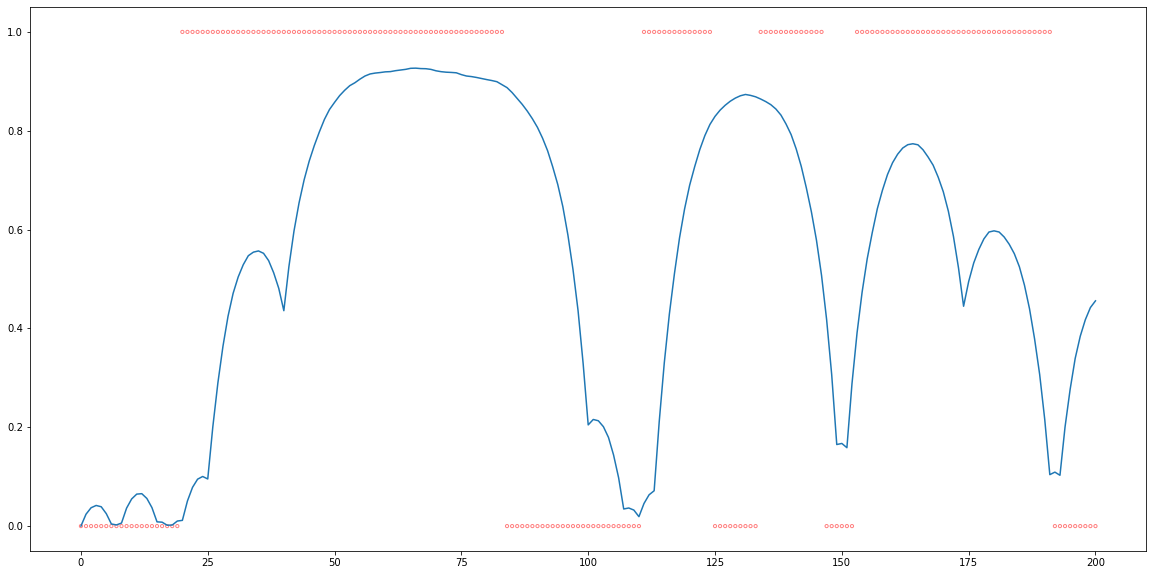

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(l)
plt.scatter(range(0, len(X)), X, facecolors='none', edgecolors='red', alpha=0.5, s=10)
plt.show()

Using a burn in of $0.3*10^7$ seems decent enough -- one can notice how, for the most part, the probabilites computed are close to $1$ (at least greater than 50 percent), when the state of the casino is $1$ (cheat), and get close to $0$ when the state of the casino is $0$ (does not cheat/fair).

# 2 {-}

**Attached you will find a R script make_1d_manifold.R that constructs data points $x(i) \in R^{10}$ for $i = 1,2,...,500$ that are localized around a 1-d manifold. The data points produced by the script are in diffusion_maps_data.csv.**

# a

**Look at the file diffusion_maps_data.csv. The data points are given in the first 10 columns. The 11th column gives a parameter $\beta$ discussed in the next subproblem. Can you find a pattern in the data? (The answer will be no, I think.)**

In [2]:
import pandas as pd
data = pd.read_csv("diffusion_maps_data.csv")
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,beta
0,-0.478914,-0.049141,-0.297305,0.087278,-0.229072,0.515732,-0.095343,-0.125465,-0.244472,0.235513,0.000000
1,-0.469228,-0.058886,-0.295487,0.039958,-0.259343,0.439233,-0.128250,-0.124088,-0.233148,0.205576,0.002004
2,-0.773425,-0.142003,-0.504606,-0.124775,-0.573540,0.447500,-0.357173,-0.209389,-0.357601,0.233504,0.004008
3,-0.723794,-0.105599,-0.461564,-0.000996,-0.448032,0.586690,-0.245723,-0.193004,-0.350866,0.282495,0.006012
4,-0.495562,-0.081031,-0.319431,-0.037716,-0.335130,0.347980,-0.196559,-0.133088,-0.235042,0.172952,0.008016


No, I cannot find a pattern in the data.

# b {-} 

**Read the script and describe what the 1-d manifold looks like. Associated with each data point is a scalar $\beta \in [0, 1]$. Explain how $\beta$ paramatrizes the manifold.**

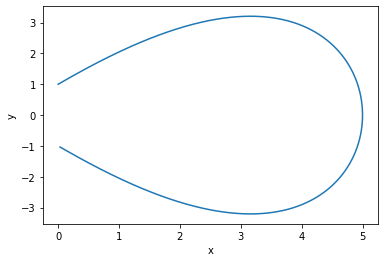

In [241]:
# ignoring seed because R vs. python
import numpy as np
import matplotlib.pyplot as plt
n = 500
beta = np.arange(0,1,1/500)
x = 5*np.sin(np.pi*beta)
y = 2*(.5-beta) + 20*beta*(1-beta)*np.cos(np.pi*beta)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The manifold looks like a horseshoe as seen above. As we can see from above as well (code), $\beta$ is used to create the horseshoe structure (it is used inside the sine and cosinse functions to smooth and create a horseshoe structure, and it is used in $2*(.5-\beta)$ in the definition of $y$ to create that opening seen at $x=0$).

# c {-}

**Reduce the data to $R^2$ and R using PCA. Plot the data points in the reduced dimension and use color to represent the value of $\beta$.**

In [214]:
X = data.iloc[:,:-1].to_numpy()
X.shape

(500, 10)

In [215]:
# covariance matrix
N = X.shape[0]
cov = (X-X.mean(axis=0)).T.dot(X-X.mean(axis=0))/N
cov.shape

(10, 10)

In [216]:
# eigen decomposition of the covariance matrix
eig_cov = np.linalg.eig(cov)
# the eigenvalues of the covariance 
eig_cov[0]

array([ 5.63757323e+00+0.00000000e+00j,  2.40480288e+00+0.00000000e+00j,
        9.04104221e-16+0.00000000e+00j, -4.24337884e-16+0.00000000e+00j,
        2.83248276e-16+0.00000000e+00j, -1.64893175e-16+0.00000000e+00j,
       -9.45935733e-17+0.00000000e+00j,  2.04444948e-17+1.90693339e-17j,
        2.04444948e-17-1.90693339e-17j,  8.76459000e-17+0.00000000e+00j])

In [217]:
# matrix of two eigenvalues corresponding to two largest eigenvalues
Q = eig_cov[1][:,np.argsort(eig_cov[0])[::-1][:2]]
Q.shape

(10, 2)

In [218]:
# coordinates in R^2
c = (X-X.mean(axis=0)).dot(Q)
c.shape

(500, 2)

//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


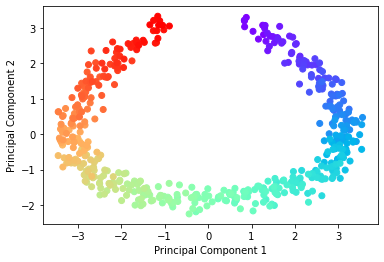

In [222]:
import matplotlib.cm as cm
plt.scatter(c[:,0], c[:,1], c=data["beta"], cmap=cm.rainbow)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# d {-}

**i. The authors of the diffusion maps paper (see Reading above) introduce the diffusion distance between the data points $x^{(i)}, x^{(j)}$,**

$$D_t^2(x^{(i)}, x^{(j)})=\sum_{k=1}^{N}\frac{(P(Z(t)=x^{(k)}|Z(0)=x^{(i)})-P(Z(t)=x^{(k)}|Z(0)=x^{(j)}))^2}{\pi(x^{(k)})}$$

**Explain the intuition behind this distance. How is $Z(t)$ constructed? What is $\pi$? Here I’m not looking for any proofs or derivations. Just explain your understanding of the construction.**

Let $X \in R^{N \times n}$ be our data. Let $K:X \times X \to R$ be a kernel that satisfies:

- $k$ is symmetric 
- $k$ is positive preserving: $k(x,y) \ge 0$

and represents some notion of similarity between the points in $X$. Because of this, we can think of the data points in $X$ as nodes of a symmetric graph whose weight function is specified by $k$. And so from the graph defined by $(X, k)$ we can construct a reversible markov chain on $X$, call it $Z(t),$ with transition probability kernel $p(x,y)=k(x,y)/d(x)$ where $d(x)$ is a normalizing constant guaranteeing $\sum_{y \in \text{state space}}p(x,y)=1$. For this exercise, $k(x,y)$ will be $500 \times 500$ and $p(x,y)$ will be $k(x,y)$ divided by the corresponding row sum. $X(t)$ will depend on the definition of $k$ since it is constructed by the graph defined by $(X, k)$. Since we will be experimenting with a couple of $k$, we will have a couple of $Z(t).$ 

$\pi$ is the stationary distribution of the markov chain $Z(t),$ detailed above. For this exercise, the stationary distribution of $X(t)$ will $\pi(x^{(i)})=\frac{d_i}{\sum_{l=1}^{N}d_{l}}$ where $d_i$ is the sum of the ith row of $k$. 

Lastly, quoting from the paper, $D_t$ defines a distance on $X$. The notion of proximity it defines reflects the connectivity in the graph of the data. $D_t(x, y)$ will be small if there is a large number of short paths connceting $x$ and $y$, i.e., if there is a large probability to transition from $x$ to $y$ and viceversa (in $t$ time steps).



**ii. The authors describe a mapping from $x(i) \in R^n$ to $y(i) \in R^N$, where $y(i)$ is given by**

$$y^{(i)}=
\begin{pmatrix} 
\lambda_1^Tr_i^{(1)} \\
\lambda_2^Tr_i^{(2)} \\
\vdots \\
\lambda_N^Tr_i^{(N)} 
\end{pmatrix}
$$

**Explain how to compute the $\lambda$ and $r$. What is the formula for $D_t^2(x^{(i}),x^{(i)})$ in terms of $y^{(i)},y^{(j)}$? Again, I’m not looking for proofs or step-by-step derivations. Just show my how you would do the computations and state the formula. (The lecture video and paper provide step by step derivations.)**

$\lambda$ are the $N$ eigenvalues (in context of this exercise $N=500$) of the transition probability matrix $P$ mentioned above, and $r$ are the the $500$ right eigenvectors of $P$. To compute $\lambda, r$:

We first create $V=D^{1/2}PD^{-1/2}$, where $D=\text{diag}(\pi(x^{(1)}), \pi(x^{(2)}), \ldots, \pi(x^{(500)})).$ $V$ is a symmetric $500 \times 500$ matrix so by the spectral decomposition theorem we can get $500$ real eigenvalues, $\beta$, with corresponding eigenvectors. Now, $\lambda=\beta$ so the eigenvalues of $V$ are the eigenvalues of $P$ and the right eigenvectors of $P$ can be defined as $r^{(i)}=D^{-1/2}q^{(i)}$ for $i=1,2,\ldots, 500$, where $q^{(i)}$ are the eigenvectors of $V$.

The formula for $D_t^2(x(i),x(j))$ in terms of $y(i),y(j)$ is:

$$D_t^2(x^{(i}),x^{(i}))$$

$$= ||y^{(i)}-y^{(j)}||^2=$$

$$||\begin{pmatrix} 
\lambda_1^Tr_i^{(1)} \\
\lambda_2^Tr_i^{(2)} \\
\vdots \\
\lambda_N^Tr_i^{(N)} 
\end{pmatrix} -
\begin{pmatrix} 
\lambda_1^Tr_j^{(1)} \\
\lambda_2^Tr_j^{(2)} \\
\vdots \\
\lambda_N^Tr_j^{(N)} 
\end{pmatrix}||^2$$

**iii. Describe how we would use diffusion maps to dimensionally reduce the data.**

1. We would pick a kernel $k$ of our choice (as long as it conforms with symmetry and positive preserving). (X, k) would gives us our markov chain $Z(t)$ with transition probability matrix $P$ ($k$ with each entry of $k$ divided by its corresponding row sum).

Note, for the exercise, I will pick the family of kernels $K=\{k | k(x^{(i)}, x^{(j)})=e^{-\frac{||x^{(i)}-x^{(j)}||^2}{\delta}}, \delta > 0\}$.

2. We create $V=D^{1/2}PD^{-1/2}$ and get the eigenvectors and eigenvalues of $V$ to get the eigenvalues and right eigenvectors of $P$ as described in ii.

3. Once we have the eigenvectors and right eigenvectors of $P$, we map our data $x(i) \in R^10$ to $y(i) \in R^500$, where $y(i)$ is given by

$$y^{(i)}=
\begin{pmatrix} 
\lambda_1^Tr_i^{(1)} \\
\lambda_2^Tr_i^{(2)} \\
\vdots \\
\lambda_N^Tr_i^{(N)} 
\end{pmatrix}
$$

4. Lastly, to map our data to an $m$ dimensional space, we pick the first $m$ entries of $y^{(i)}$ for each $i=1,2,\ldots, 500$ (usually ignoring the first entry -- so choosing the subsequent $m$ entries of $y^{(i)}$). For this exercise, since we are mapping to a $2$ dimensional space we will choose entries $2,3$ of $y^{(i)}$ (i.e, the first two entries after ignoring the first one).

**iv. Now repeat (b), but use diffusion maps to dimensionally reduce the data. Experiment with different kernels and different time parameters t in the diffusion maps.**

Lets create a function that does the above mentioned $4$ steps.

In [200]:
def diffusion_map(T, delta):
    """Reduces data to 2 dimensional
    Args:
        T: Markov Chain time steps, positive scalar
        delta: bandwidth parameter in kernel function, positive scalar
    
    Returns:
        c: matrix of shape (500, 2)
    
    """
    # Kernel matrix, probability transition matrix, and 
    # stationary distribution of P
    K = np.exp(-X.dot(X.T)/delta) 
    d = np.diag(K.sum(axis=1))
    P = np.linalg.inv(d).T.dot(K) 
    D = d/d.sum()
    
    V = np.sqrt(D).dot(P).dot(np.sqrt(np.linalg.inv(D)))
    eig_V = np.linalg.eig(V)
    Q = eig_V[1][:,np.argsort(abs(eig_V[0]))[::-1][1:3]]
    
    # right eigenvectors of P corresponding to 
    # 2nd and 3rd most dominant eigenvalues of P
    R = np.sqrt(np.linalg.inv(D)).dot(Q).real
    e = np.sort(abs(eig_V[0]))[::-1][1:3].real
    
    # coordinates in R^2
    c = (e**T)*R
    
    return c

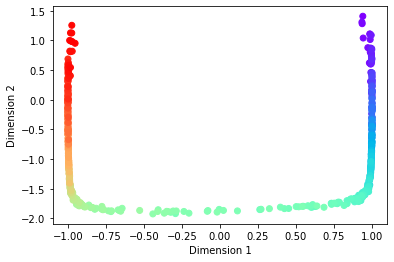

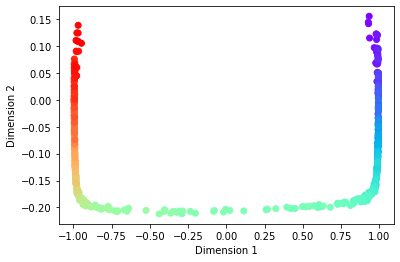

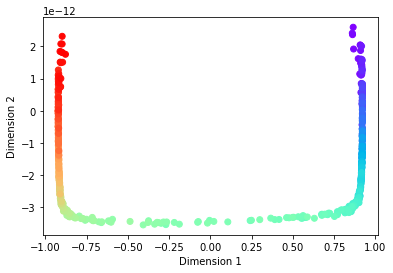

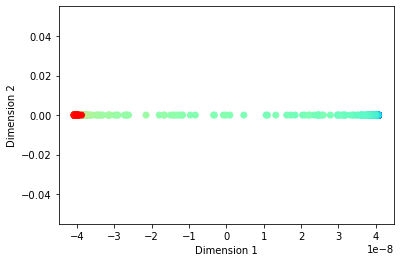

In [227]:
times = [1, 5, 50, 10000]
for t in times:
    c = diffusion_map(t, 1)
    plt.scatter(c[:,0],c[:,1], c=data["beta"], cmap=cm.rainbow)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

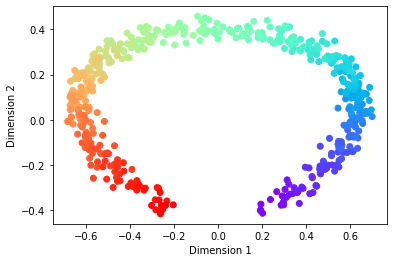

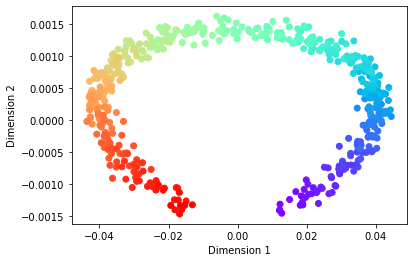

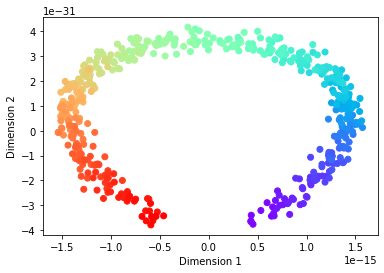

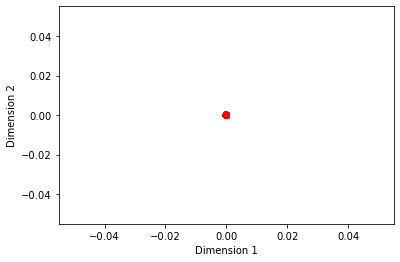

In [225]:
for t in times:
    c = diffusion_map(t, 10)
    plt.scatter(c[:,0], c[:,1], c=data["beta"], cmap=cm.rainbow)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

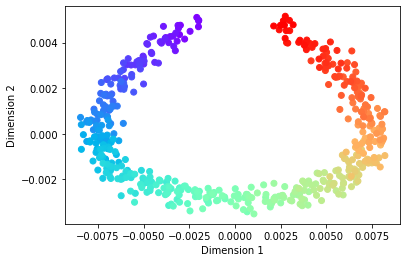

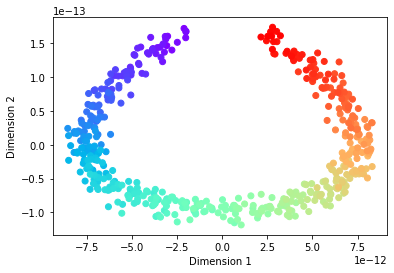

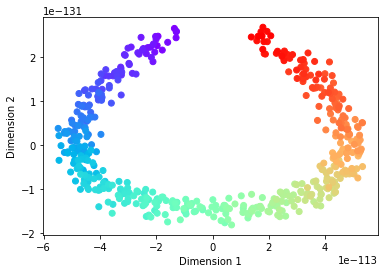

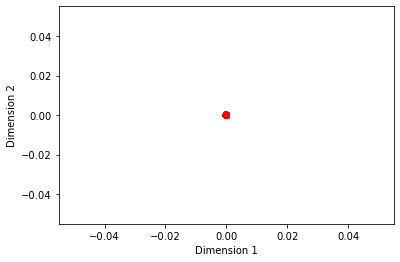

In [226]:
for t in times:
    c = diffusion_map(t, 1000)
    plt.scatter(c[:,0],c[:,1], c=data["beta"], cmap=cm.rainbow)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

The greater the bandwidth, the higher weights you will be assigning to points further away (by definition of $k$) as can seen below in the plots. From the above plots, it seems like a bandiwth of $10$ works well, and $T$ doesn't make much of a difference until it becomes very big (for ex: $T=10000$), in which case you loose information regarding the geometry of points as said in the lecture.

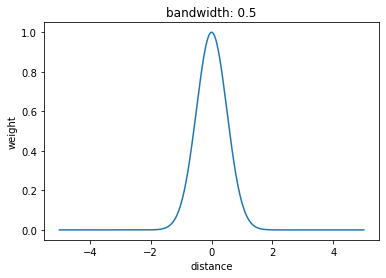

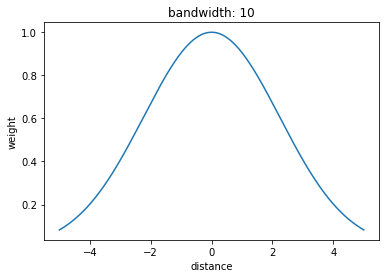

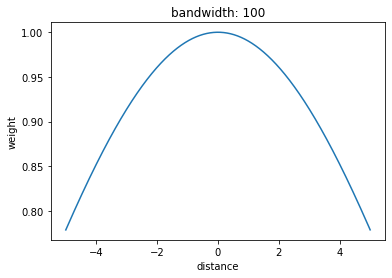

In [211]:
def kernel(delta):
    return np.exp(-(0-x)**2/delta)
x = np.arange(-5, 5, 0.001)
for delta in [0.5, 10, 100]:
    y = kernel(delta)
    plt.plot(x, y)
    plt.title(f"bandwidth: {delta}")
    plt.xlabel("distance")
    plt.ylabel("weight")
    plt.show()